In [1]:
from fastai.vision.all import *
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from fastai.callback.tracker import SaveModelCallback, EarlyStoppingCallback
from fastai.interpret import ClassificationInterpretation
import matplotlib.pyplot as plt


In [2]:
# Пути к файлам CSV
train_csv_path = "train_data.csv"
test_csv_path = "test_data.csv"

# Загрузка данных
train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

# Путь к папке с изображениями
path = Path('')

In [3]:
print("Длина обучающего набора данных:", len(train_data))
print("Длина тестового набора данных:", len(test_data))

Длина обучающего набора данных: 6194
Длина тестового набора данных: 1554


In [4]:
# Создание DataBlock
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_x=ColReader('image_path', pref=path),
                   get_y=ColReader('label'),
                   splitter=RandomSplitter())

In [5]:
# Создание DataLoaders
dls = dblock.dataloaders(train_data, bs=64)

In [6]:
# Определение пути для сохранения модели
model_save_path = "fit_one_cycle"

# Определение коллбэка EarlyStopping
early_stopping_cb = EarlyStoppingCallback(monitor='valid_loss', min_delta=0.01, patience=3)

# Определение коллбэка SaveModel
save_model_cb = SaveModelCallback(monitor='valid_loss', fname='best_model')

# Определение коллбэка для сохранения всех этапов обучения
save_every_epoch_cb = SaveModelCallback(every_epoch=True, monitor='valid_loss', fname='model_checkpoint')

# Создание объекта Learner с использованием cnn_learner
learn = cnn_learner(dls, resnet34, metrics=accuracy, cbs=[early_stopping_cb, save_model_cb, save_every_epoch_cb])

# Создание объекта Recorder для отслеживания всех метрик обучения
recorder = Recorder(train_metrics=True)

# Вызов метода fit для модели с добавлением всех коллбэков
learn.fit_one_cycle(n_epoch=20, cbs=[early_stopping_cb, save_model_cb, save_every_epoch_cb, recorder])

C:\Users\14488\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


Better model found at epoch 0 with valid_loss value: 2.00142502784729.
Better model found at epoch 1 with valid_loss value: 1.4690247774124146.
Better model found at epoch 2 with valid_loss value: 1.295072317123413.
Better model found at epoch 3 with valid_loss value: 1.2458763122558594.
Better model found at epoch 4 with valid_loss value: 1.2237004041671753.
Better model found at epoch 5 with valid_loss value: 1.1729151010513306.
Better model found at epoch 6 with valid_loss value: 1.165969729423523.
No improvement since epoch 3: early stopping


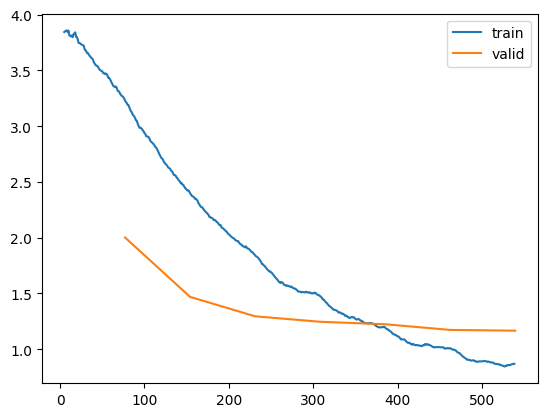

In [7]:
# Визуализация процесса обучения
recorder.plot_loss()

In [8]:
# Сохранение модели
learn.export(fname=model_save_path)